# Training Model - SMOTE

# Import Library

In [3]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import yaml
import scipy.stats as scs
import src.util as util
import yaml

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# library for model selection and models
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV

import json
from datetime import datetime
#import datetime as dt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import uuid

In [4]:
params_dir = "config/config.yaml"

In [5]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [6]:
params = load_params(params_dir)

In [7]:
params

{'raw_dataset_dir': 'dataset/1 - raw data/',
 'train_set_path': ['dataset/2 - processed/X_train.pkl',
  'dataset/2 - processed/y_train.pkl'],
 'valid_set_path': ['dataset/2 - processed/X_valid.pkl',
  'dataset/2 - processed/y_valid.pkl'],
 'test_set_path': ['dataset/2 - processed/X_test.pkl',
  'dataset/2 - processed/y_test.pkl'],
 'train_feng_set_path': ['dataset/2 - processed/X_train_feng.pkl',
  'dataset/2 - processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['dataset/2 - processed/X_valid_feng.pkl',
  'dataset/2 - processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['dataset/2 - processed/X_test_feng.pkl',
  'dataset/2 - processed/y_test_feng.pkl'],
 'impute_data_train': ['dataset/2 - processed/X_train_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_test': ['dataset/2 - processed/X_test_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_valid': ['dataset/2 - processed/X_valid_impute.pkl',
  'dataset/2 - processed/y_valid_impute.pkl

In [8]:
config_data = util.load_config()

## Read Data

In [9]:
#Read data X_train dan y_sm hasil dari data preparation
X_sm_clean = util.pickle_load(config_data["standar_scaler_sm"][0])
y_sm = util.pickle_load(config_data["standar_scaler_sm"][1])

#Read data X_valid dan y_valid hasil dari data preparation
X_valid_clean = util.pickle_load(config_data["standar_scaler_valid"][0])
y_valid = util.pickle_load(config_data["standar_scaler_valid"][1])

#Read data X_test dan y_test hasil dari data preparation
X_test_clean = util.pickle_load(config_data["standar_scaler_test"][0])
y_test = util.pickle_load(config_data["standar_scaler_test"][1])

In [10]:
X_sm_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,1.373814,-0.006769,0.008815,1.416365,0,1,0,0,1,0,1,1,-1.405065
1,1.570781,-1.328749,0.499957,0.613784,1,0,0,0,1,1,1,2,1.525871
2,-0.792821,-1.328749,-0.667869,1.184949,1,0,0,0,1,1,1,2,0.793137
3,-0.989788,-0.055043,-2.283179,-0.965283,0,1,0,1,0,1,0,1,1.159504
4,0.192013,0.771342,1.318526,-1.414892,1,0,0,1,0,0,0,2,-1.038698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,0.853904,0.777512,1.859464,-0.636993,0,1,0,0,0,1,0,1,1.159504
11132,-0.082941,-0.097127,0.120264,0.514748,0,0,1,0,0,1,0,2,0.793137
11133,0.564658,0.323586,-0.354039,-1.151578,0,0,0,0,0,0,0,1,-1.405065
11134,-0.328323,-1.328749,-0.471997,-0.864220,0,0,0,0,0,1,0,1,-0.672331


In [11]:
X_valid_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
9372,-1.088271,-0.059357,0.325329,1.288943,0,1,1,0,0,0,1,1,-1.405065
4916,-0.201921,-0.320615,-1.180839,-0.706920,1,0,0,0,1,0,1,1,0.426770
1778,-0.004954,0.228616,0.107044,-0.558705,1,0,1,0,0,1,1,1,0.060403
267,-0.497371,-1.328749,0.041558,-1.506460,0,1,1,0,0,1,0,2,0.793137
1300,-0.398887,0.860503,-1.191753,1.084697,0,1,1,0,0,1,0,1,-1.405065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,-0.201921,0.378814,-0.438669,0.077094,1,0,0,1,0,1,0,1,1.159504
4085,-0.694338,0.848413,-1.388210,1.619927,0,1,1,0,0,1,1,1,-0.305964
1161,-0.004954,0.374169,1.176641,0.448334,0,1,1,0,0,1,0,1,0.426770
6219,-0.398887,0.541831,-0.122156,-0.833696,0,1,0,0,1,1,0,1,-1.405065


In [12]:
X_valid_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
9372,-1.088271,-0.059357,0.325329,1.288943,0,1,1,0,0,0,1,1,-1.405065
4916,-0.201921,-0.320615,-1.180839,-0.706920,1,0,0,0,1,0,1,1,0.426770
1778,-0.004954,0.228616,0.107044,-0.558705,1,0,1,0,0,1,1,1,0.060403
267,-0.497371,-1.328749,0.041558,-1.506460,0,1,1,0,0,1,0,2,0.793137
1300,-0.398887,0.860503,-1.191753,1.084697,0,1,1,0,0,1,0,1,-1.405065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,-0.201921,0.378814,-0.438669,0.077094,1,0,0,1,0,1,0,1,1.159504
4085,-0.694338,0.848413,-1.388210,1.619927,0,1,1,0,0,1,1,1,-0.305964
1161,-0.004954,0.374169,1.176641,0.448334,0,1,1,0,0,1,0,1,0.426770
6219,-0.398887,0.541831,-0.122156,-0.833696,0,1,0,0,1,1,0,1,-1.405065


In [13]:
y_valid

9372    0
4916    0
1778    0
267     0
1300    0
       ..
6707    1
4085    0
1161    1
6219    0
976     1
Name: Exited, Length: 1500, dtype: int64

In [14]:
X_test_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
2129,-0.694338,0.296793,0.598185,0.160349,0,1,1,0,0,1,0,1,-0.305964
7419,-0.103437,0.352751,1.100241,-1.083562,1,0,0,1,0,0,0,2,-0.672331
724,-0.497371,0.255778,0.510871,0.293625,0,1,1,0,0,1,1,1,-0.672331
5592,-2.171589,-1.328749,-0.777011,-0.488087,0,1,0,0,1,0,0,2,0.426770
5333,-0.792821,0.281390,0.761899,1.641863,0,1,0,0,1,0,0,1,-1.405065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,-0.891304,1.031927,-0.962554,0.056860,0,1,1,0,0,1,0,1,1.525871
6709,2.457131,0.736519,2.213495,0.324822,1,0,0,1,0,0,1,1,-1.771432
5148,2.851065,-1.328749,0.914699,0.712781,0,1,0,0,1,1,1,2,-0.672331
5244,0.192013,-1.328749,0.270758,-0.623920,0,1,0,0,1,1,1,2,0.060403


In [15]:
y_test

2129    0
7419    0
724     0
5592    0
5333    0
       ..
5829    0
6709    1
5148    0
5244    0
4597    1
Name: Exited, Length: 1500, dtype: int64

## XGboost Classifier

In [16]:
def binary_classification_xgb_tuned(x_train, y_train, x_valid, y_valid, x_test, y_test):
    # set hyperparameters for tuning
    param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1.0],
    'subsample': [0.5, 0.7, 1.0]
    }

    # instantiate the classifier
    xgb_clf = xgb.XGBClassifier(random_state=123)
    
    # perform grid search to find best hyperparameters
    grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=5)
    grid_search.fit(x_train, y_train)
    print('Best hyperparameters:', grid_search.best_params_)
    
    # create classifier with best hyperparameters
    best_xgb_clf = xgb.XGBClassifier(**grid_search.best_params_, random_state=123)
    
    # train the model
    best_xgb_clf.fit(x_train, y_train)
    
    # evaluate on validation set
    valid_pred = best_xgb_clf.predict(x_valid)
    valid_acc = accuracy_score(y_valid, valid_pred)
    print('Validation accuracy:', valid_acc)
    
    # evaluate on test set
    test_pred = best_xgb_clf.predict(x_test)
    test_acc = accuracy_score(y_test, test_pred)
    print('Test accuracy:', test_acc)
    
    return best_xgb_clf

In [17]:
xgb_best = binary_classification_xgb_tuned(x_train = X_sm_clean, y_train = y_sm, \
                                           x_valid = X_valid_clean, y_valid = y_valid, \
                                           x_test = X_test_clean, y_test = y_test)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Validation accuracy: 0.8686666666666667
Test accuracy: 0.8613333333333333


In [18]:
test_pred = xgb_best.predict(X_test_clean)
test_acc = accuracy_score(y_test, test_pred)

In [19]:
test_acc

0.8613333333333333

In [20]:
print(classification_report(y_test, test_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1198
           1       0.68      0.59      0.63       302

    accuracy                           0.86      1500
   macro avg       0.79      0.76      0.77      1500
weighted avg       0.86      0.86      0.86      1500



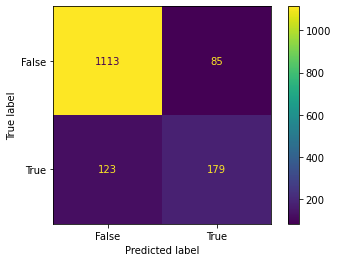

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels = [False, True])
plt.show()

AUC: 0.8643876659775122


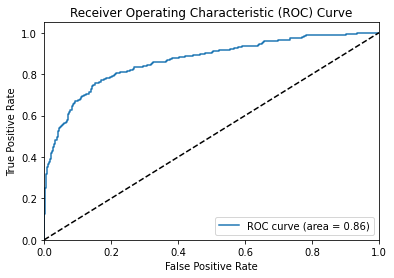

In [24]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the positive class
probs = xgb_best.predict_proba(X_test_clean)[:, 1]

# calculate fpr and tpr for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# calculate AUC
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.savefig('roc_auc.png')
plt.show()

## Save Log Best Model

In [47]:
def save_model_log(model, model_name, X_test, y_test):
    # generate unique id
    model_uid = uuid.uuid4().hex
    
    # get current time and date
    now = datetime.now()
    training_time = now.strftime("%H:%M:%S")
    training_date = now.strftime("%Y-%m-%d")
    
    # generate classification report
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # create dictionary for log
    log = {"model_name": model_name,
           "model_uid": model_uid,
           "training_time": training_time,
           "training_date": training_date,
           "classification_report": report}
    
    # menyimpan log sebagai file JSON
    with open('training_log/training_log.json', 'w') as f:
        json.dump(log, f)

In [48]:
save_model_log(model = xgb_best, model_name = "XGBoost CV", X_test = X_test_clean, y_test=y_test)

## Evaluation Metrics

In [49]:
import pandas as pd
from sklearn.metrics import classification_report

# definisikan model-model yang ingin dibandingkan
models = {
          'XGboost CV':xgb_best
         }

# loop untuk menghitung dan menyimpan metrik untuk setiap model
results = {}
for name, model in models.items():
    # hitung prediksi pada data test
    y_pred = model.predict(X_test_clean)
    # hitung metrik
    report = classification_report(y_test, y_pred, output_dict=True)
    # simpan metrik ke dictionary
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score'],
        'accuracy': report['accuracy'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1_score': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1_score': report['weighted avg']['f1-score']
    }

# buat dataframe dari dictionary
df_results = pd.DataFrame.from_dict(results, orient='index')

# tampilkan dataframe sebagai tabel
df_results

,precision,recall,f1_score,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1_score
XGboost CV,0.862951,0.868667,0.86481,0.868667,0.803536,0.769816,0.784626,0.862951,0.868667,0.86481


# Save Model

## XgBoost

In [50]:
xgboost_cv = 'model/5 - Model Final/xgboost_cv.pkl'
with open(xgboost_cv, 'wb') as file:
    pickle.dump(xgb_best, file)

## Cara Load Model

In [ ]:
# Load model dari folder models
"""
filename = 'models/model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
"''"